In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


##  📌 Introduction ##

This project analyzes the Heart Disease dataset (1181 rows), which contains patient health records such as age, sex, chest pain type, blood pressure, cholesterol, blood sugar, ECG results, maximum heart rate, and exercise-induced angina. The target variable indicates whether a patient has heart disease (1) or not (0).

The goals of this analysis are to:

Perform Exploratory Data Analysis (EDA) to understand the dataset.

Apply statistical tests (t-tests, ANOVA) to compare groups.

Calculate odds ratios for key health indicators.

Use regression techniques (linear, multiple, polynomial) to explore relationships between risk factors.

This study aims to uncover important patterns and risk factors linked to heart disease.

In [37]:
import pandas as pd

# Load CSV correctly
df = pd.read_csv(r"C:\Users\Riya\Global_Superstore.ipynb\heart_statlog_cleveland_hungary_final.csv")

# Quick checks
print(df.shape)
print(df.info())
df.head(10)



(1190, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [38]:
df.isnull().sum()


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [39]:
df.shape

(1190, 12)

In [40]:
df.describe()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


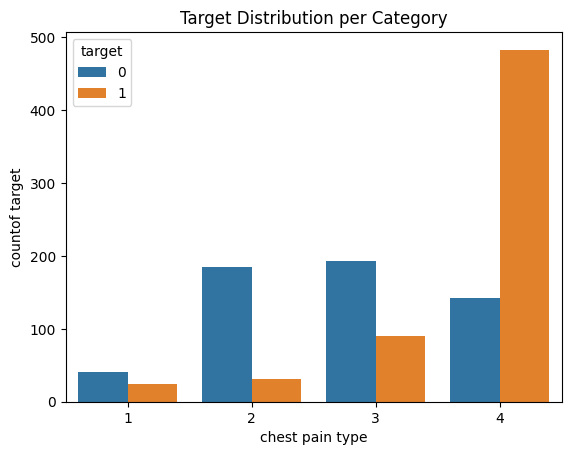

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="chest pain type", hue="target", data=df)
plt.xlabel("chest pain type")
plt.ylabel("countof target")
plt.title("Target Distribution per Category")
plt.show()


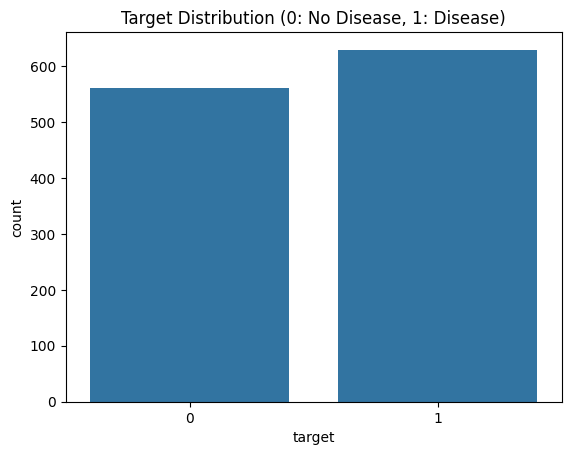

In [42]:
sns.countplot(x="target", data=df)
plt.xlabel("target")
plt.ylabel("count")
plt.title("Target Distribution (0: No Disease, 1: Disease)")
plt.show()

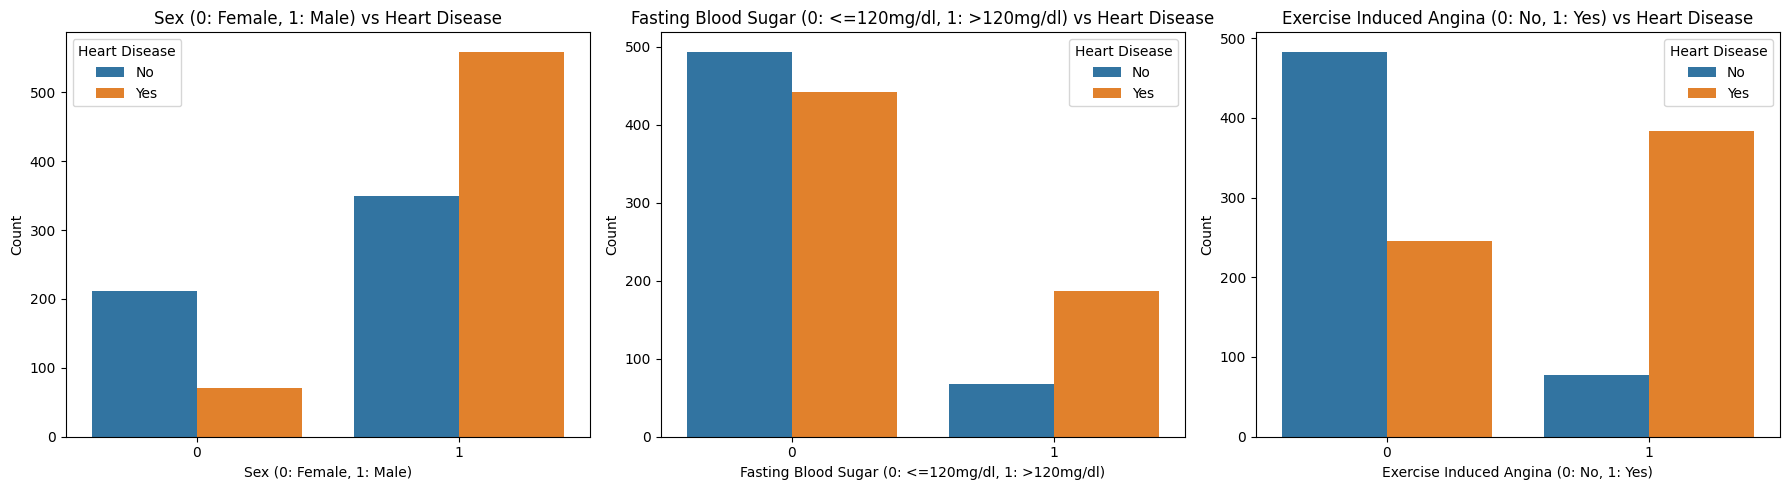

In [43]:
binary_features = ['sex', 'fasting blood sugar', 'exercise angina']
feature_labels = {
    'sex': 'Sex (0: Female, 1: Male)',
    'fasting blood sugar': 'Fasting Blood Sugar (0: <=120mg/dl, 1: >120mg/dl)',
    'exercise angina': 'Exercise Induced Angina (0: No, 1: Yes)'
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(binary_features):
    sns.countplot(x=feature, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f"{feature_labels[feature]} vs Heart Disease")
    axes[i].set_xlabel(feature_labels[feature])
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Heart Disease", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

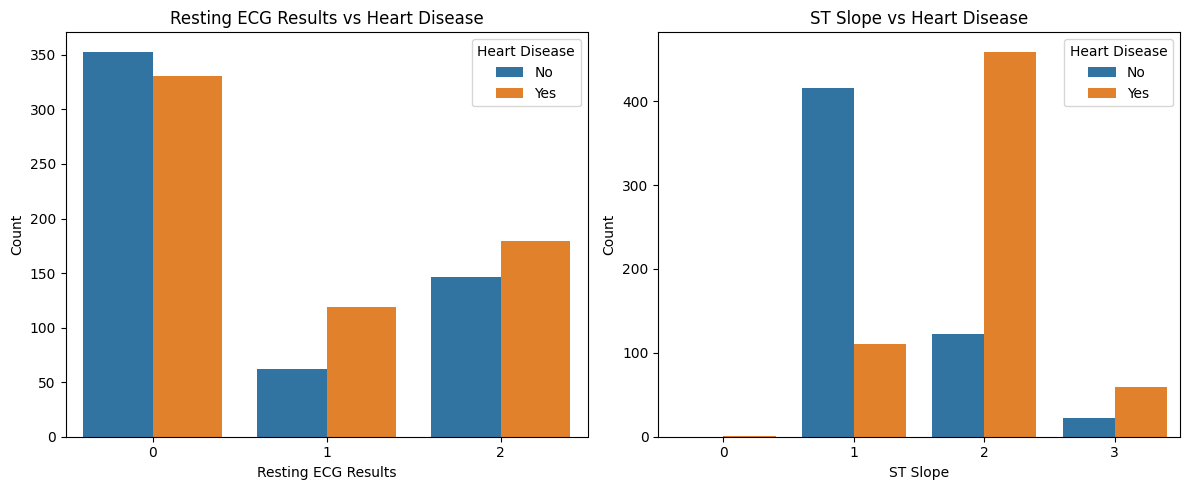

In [44]:
categorical_features = ['resting ecg', 'ST slope']
feature_labels_cat = {
    'resting ecg': 'Resting ECG Results',
    'ST slope': 'ST Slope'
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for idx, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='target', data=df, ax=axes[idx])
    axes[idx].set_title(f"{feature_labels_cat[feature]} vs Heart Disease")
    axes[idx].set_xlabel(feature_labels_cat[feature])
    axes[idx].set_ylabel("Count")
    axes[idx].legend(title="Heart Disease", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

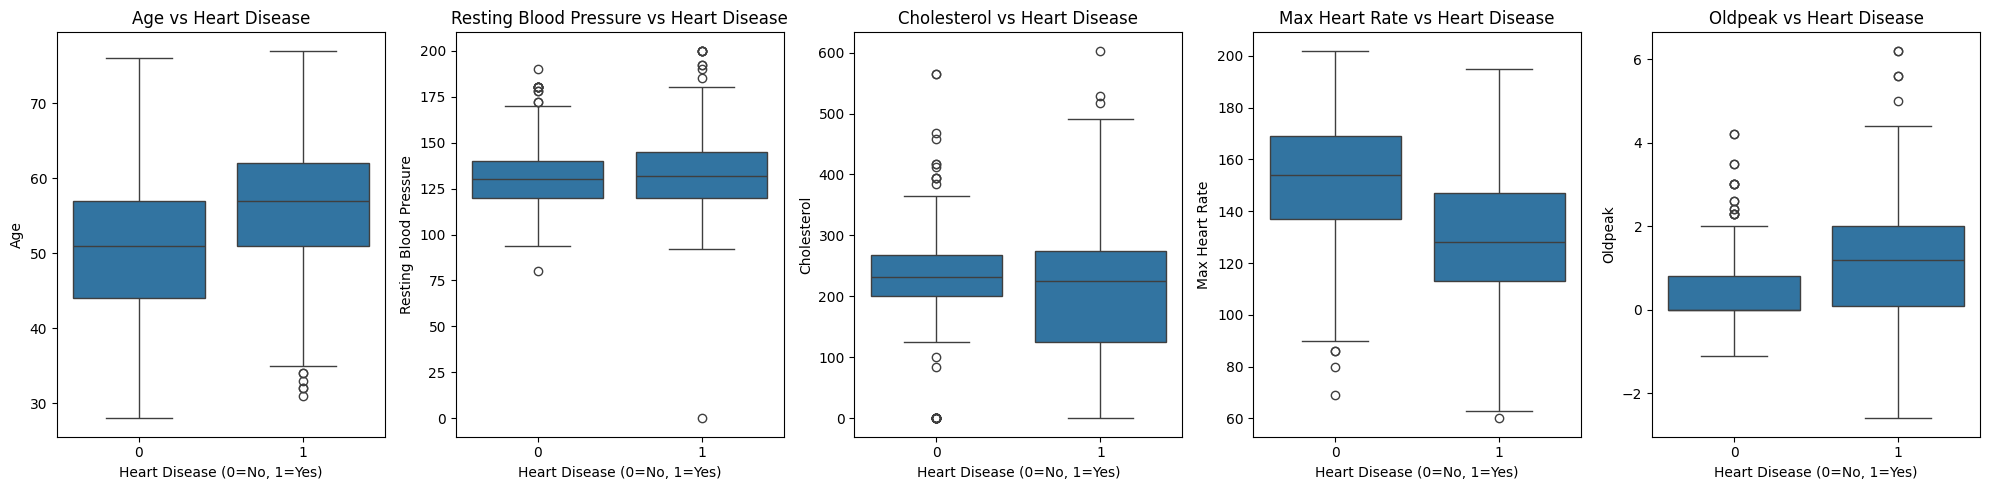

In [45]:
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
feature_names = {
    'age': 'Age',
    'resting bp s': 'Resting Blood Pressure',
    'cholesterol': 'Cholesterol',
    'max heart rate': 'Max Heart Rate',
    'oldpeak': 'Oldpeak'
}

fig, axes = plt.subplots(1, len(numeric_features), figsize=(20, 5))
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f"{feature_names[feature]} vs Heart Disease")
    axes[i].set_xlabel("Heart Disease (0=No, 1=Yes)")
    axes[i].set_ylabel(feature_names[feature])
plt.tight_layout()
plt.show()

In [46]:
# Define mappings for categorical values
chest_pain_map = {1: "Typical Angina", 2: "Atypical Angina", 3: "Non-anginal Pain", 4: "Asymptomatic"}
resting_ecg_map = {0: "Normal", 1: "ST-T Abnormality", 2: "Left Ventricular Hypertrophy"}
st_slope_map = {1: "Upsloping", 2: "Flat", 3: "Downsloping"}

# Rename columns after encoding
df_encoded = pd.get_dummies(
    df,
    columns=['chest pain type', 'resting ecg', 'ST slope'],
    drop_first=True
)

# Rename chest pain type columns
for num, label in chest_pain_map.items():
    col = f'chest pain type_{num}'
    if col in df_encoded.columns:
        df_encoded.rename(columns={col: f'chest pain type: {label}'}, inplace=True)

# Rename resting ecg columns
for num, label in resting_ecg_map.items():
    col = f'resting ecg_{num}'
    if col in df_encoded.columns:
        df_encoded.rename(columns={col: f'resting ecg: {label}'}, inplace=True)

# Rename ST slope columns
for num, label in st_slope_map.items():
    col = f'ST slope_{num}'
    if col in df_encoded.columns:
        df_encoded.rename(columns={col: f'ST slope: {label}'}, inplace=True)

print(df_encoded.head())

   age  sex  resting bp s  cholesterol  fasting blood sugar  max heart rate  \
0   40    1           140          289                    0             172   
1   49    0           160          180                    0             156   
2   37    1           130          283                    0              98   
3   48    0           138          214                    0             108   
4   54    1           150          195                    0             122   

   exercise angina  oldpeak  target  chest pain type: Atypical Angina  \
0                0      0.0       0                              True   
1                0      1.0       1                             False   
2                0      0.0       0                              True   
3                1      1.5       1                             False   
4                0      0.0       0                             False   

   chest pain type: Non-anginal Pain  chest pain type: Asymptomatic  \
0              

In [47]:
df_encoded

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type: Atypical Angina,chest pain type: Non-anginal Pain,chest pain type: Asymptomatic,resting ecg: ST-T Abnormality,resting ecg: Left Ventricular Hypertrophy,ST slope: Upsloping,ST slope: Flat,ST slope: Downsloping
0,40,1,140,289,0,172,0,0.0,0,True,False,False,False,False,True,False,False
1,49,0,160,180,0,156,0,1.0,1,False,True,False,False,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,True,False,True,False,False
3,48,0,138,214,0,108,1,1.5,1,False,False,True,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,110,264,0,132,0,1.2,1,False,False,False,False,False,False,True,False
1186,68,1,144,193,1,141,0,3.4,1,False,False,True,False,False,False,True,False
1187,57,1,130,131,0,115,1,1.2,1,False,False,True,False,False,False,True,False
1188,57,0,130,236,0,174,0,0.0,1,True,False,False,False,True,False,True,False


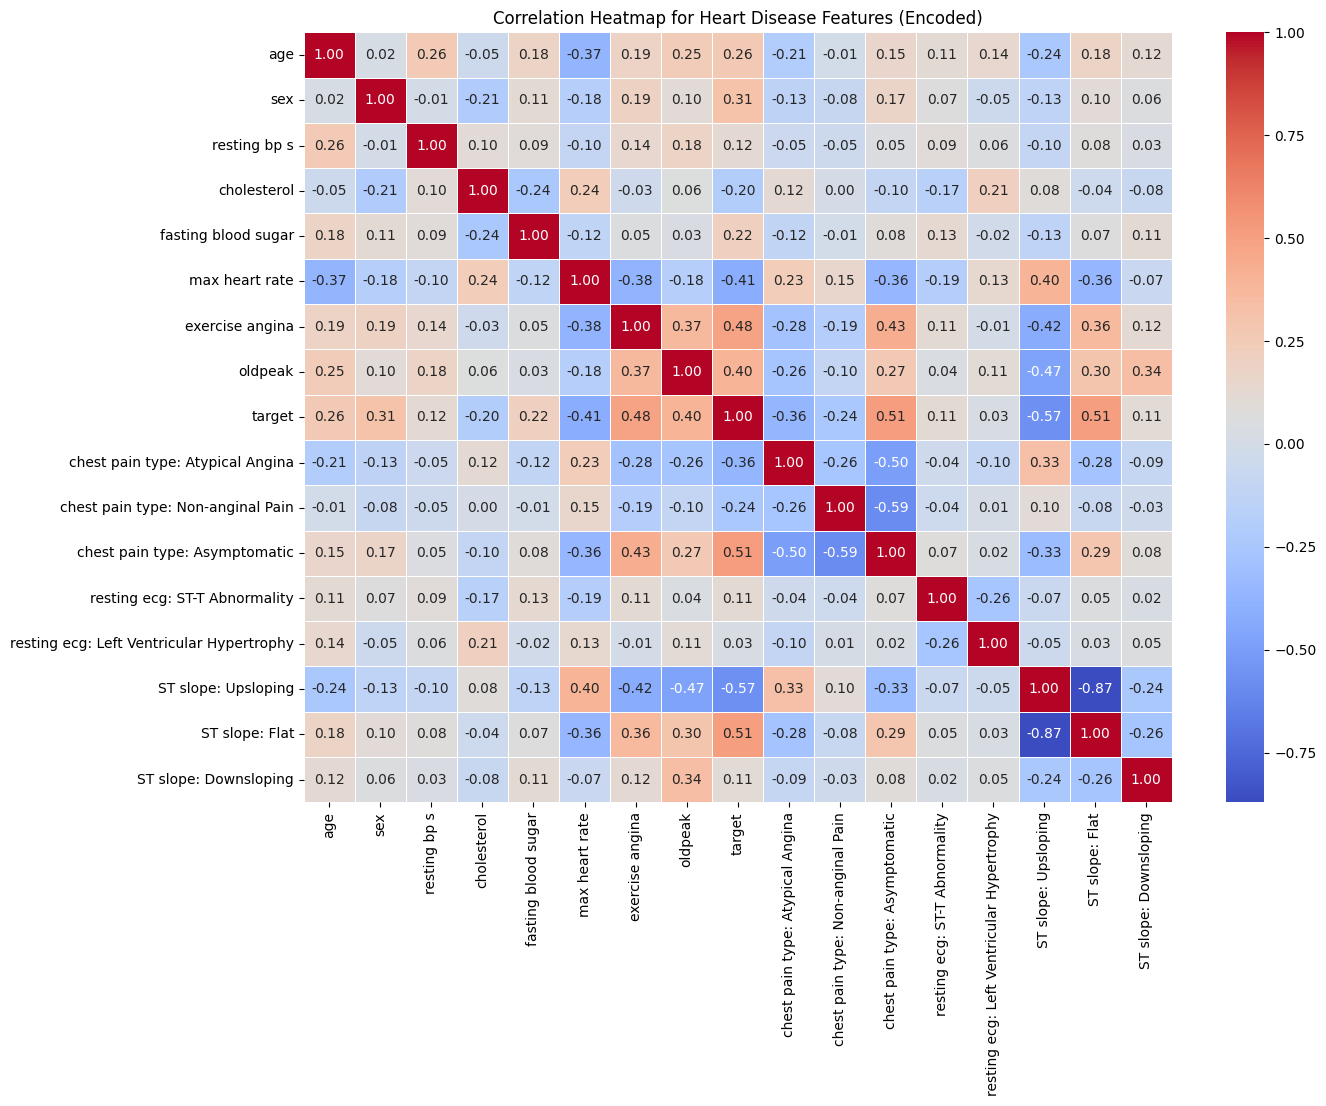

In [48]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Heart Disease Features (Encoded)")
plt.show()

In [49]:

numeric_test_results = {}
for feature in numeric_features:
    group1 = df[df['target'] == 0][feature]
    group2 = df[df['target'] == 1][feature]
    t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')
    numeric_test_results[feature] = {'t_stat': t_stat, 'p_value': p_val}

print("T-test results (numeric features):")
for feature, result in numeric_test_results.items():
    print(f"{feature}: t={result['t_stat']:.2f}, p={result['p_value']:.3e}")

# ANOVA for categorical features with multiple groups
anova_results = {}
for feature in categorical_features + ['chest pain type']:
    groups = [df[df[feature] == val]['max heart rate'] for val in df[feature].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results[feature] = {'f_stat': f_stat, 'p_value': p_val}

print("\nANOVA results (categorical features):")
for feature, result in anova_results.items():
    print(f"{feature}: F={result['f_stat']:.2f}, p={result['p_value']:.3e}")

T-test results (numeric features):
age: t=-9.36, p=3.907e-20
resting bp s: t=-4.22, p=2.675e-05
cholesterol: t=6.98, p=5.040e-12
max heart rate: t=15.64, p=2.694e-50
oldpeak: t=-14.97, p=1.513e-46

ANOVA results (categorical features):
resting ecg: F=26.59, p=5.052e-12
ST slope: F=73.88, p=8.247e-44
chest pain type: F=60.29, p=2.824e-36


--- Evaluation Results ---
Confusion Matrix:
 [[ 93  19]
 [ 14 112]]
Accuracy: 0.861
Precision: 0.855
Recall: 0.889
F1-score: 0.872
ROC-AUC: 0.931

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       112
           1       0.85      0.89      0.87       126

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



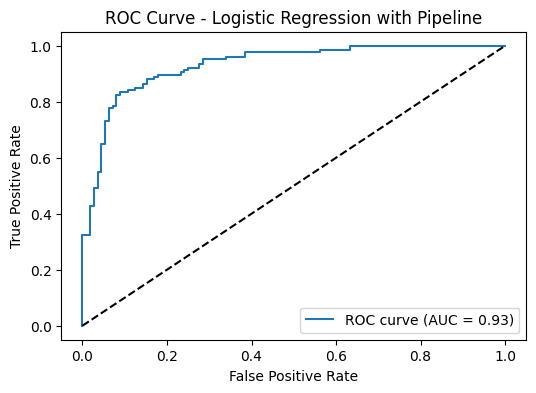

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# --- MODIFICATION: Start from the raw DataFrame, not the pre-encoded one ---
# Assume 'df' is your DataFrame with the original, un-encoded columns
# df = pd.read_csv('your_data.csv')

# 1. Prepare features and target from the raw DataFrame
X = df.drop('target', axis=1)
y = df['target']

# 2. Identify numeric and categorical columns for the preprocessor
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']

# 3. Split data before any scaling or encoding
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- MODIFICATION: Create the preprocessing and model pipeline ---
# 4. Create a preprocessor to scale numeric data and one-hot encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 5. Build the final pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 6. Train the entire pipeline
logreg_pipeline.fit(X_train, y_train)

# --- The rest of your evaluation code remains the same, just using the pipeline ---

# 7. Predict using the trained pipeline
y_pred = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# 8. Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("--- Evaluation Results ---")
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with Pipeline')
plt.legend()
plt.show()
